**ASSIGNMENT 3 - HYPER PARAMETER TUNING**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING AND ANALYZING THE DATA

In [3]:
data=pd.read_csv('/content/credit_card_default.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 25)

In [5]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

NO NaN AND CATEGORICAL VARIABLES

In [7]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
data.drop(['ID'],axis=1,inplace=True) #DROPPING THE COLUMN 'ID' SINCE IT IS NOT REQUIRED FOR CLASSIFICATION

In [9]:
data['default payment next month'].unique() # TARGET COLUMN

array([1, 0])

In [10]:
data.corr() # FINDING THE CORRELATION BETWEEN THE FEATURES

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.109824,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.030637,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.140573,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.109824,-0.030637,-0.140573,1.000000,-0.416204,0.019594,0.024166,0.032809,0.032910,0.035447,...,-0.024817,-0.026862,-0.022642,-0.005574,-0.008623,-0.003802,-0.013183,-0.001821,-0.007269,-0.025586
AGE,0.144713,-0.090874,0.175061,-0.416204,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019594,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024166,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032809,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.032910,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035447,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


<Axes: >

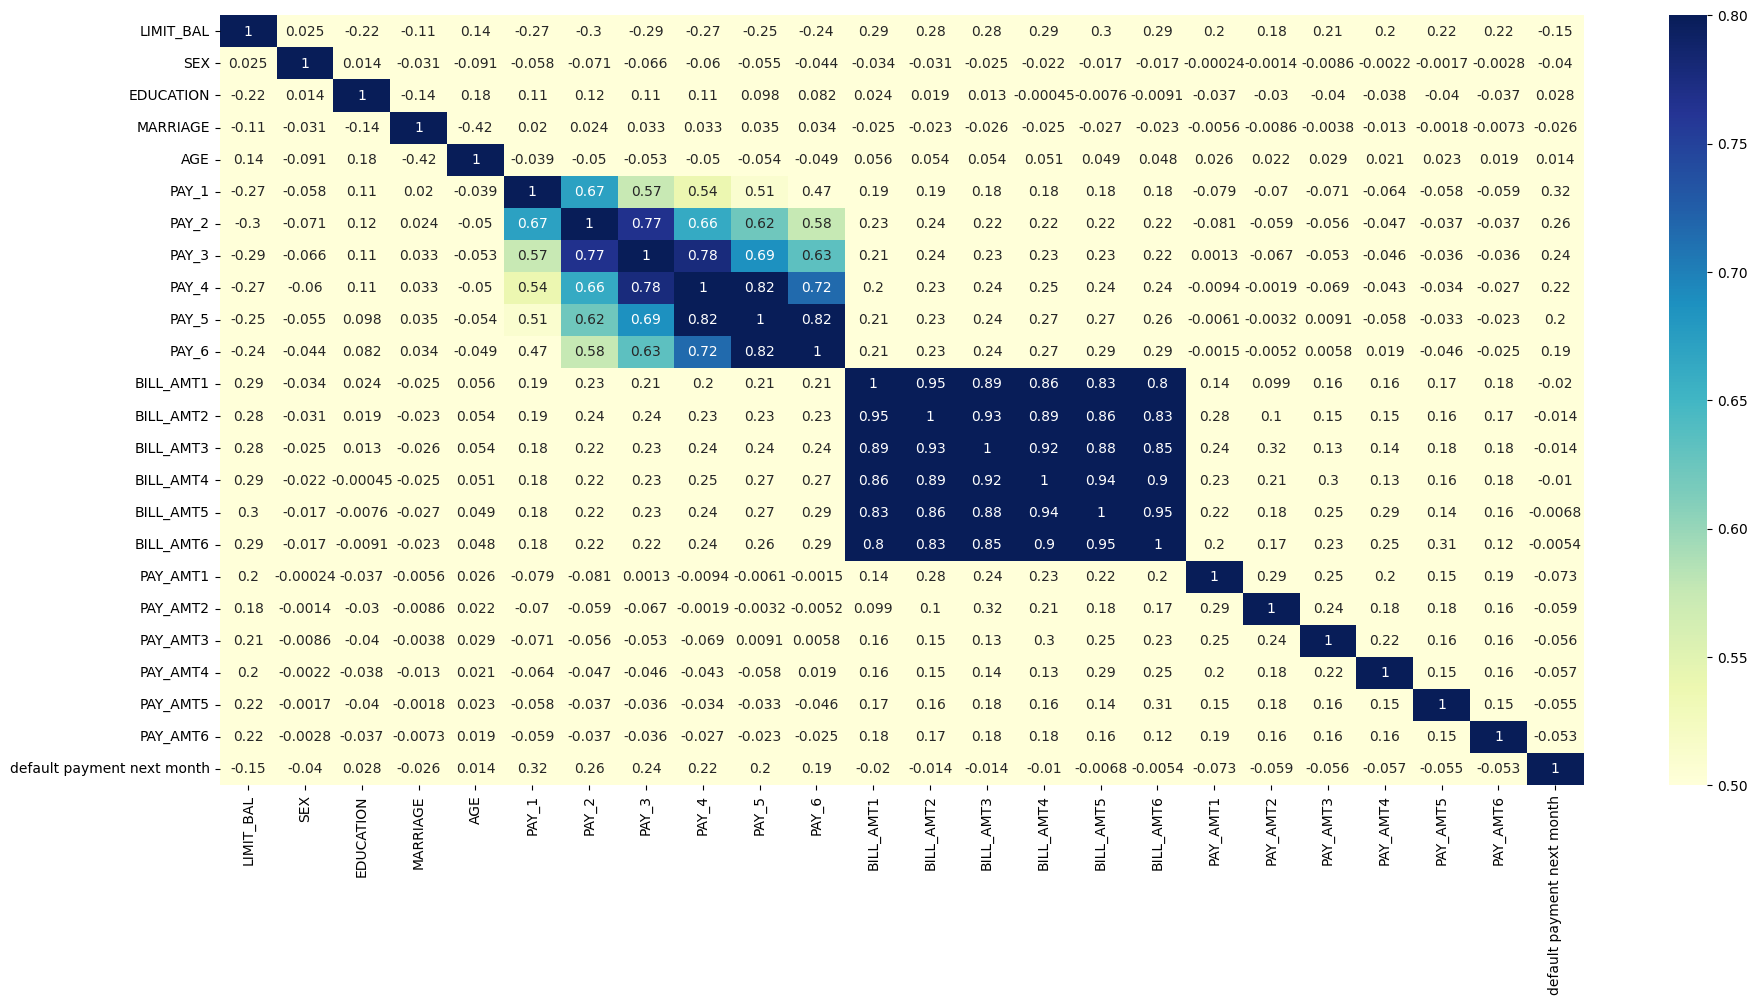

In [11]:
# plotting the heatmap
corrmatrix=data.corr()
plt.figure(figsize=(22,10))
sns.heatmap(corrmatrix,annot=True,vmin=0.5,vmax=0.8,cmap='YlGnBu')

THERE IS NO FEATURES WITH ZERO CORRELEATION, BUT SOME FEATURES ARE HIGHLY CORRELATED LIKE 'BILL_AMT1' AND 'BILL_AMT2. BUT WE CANNOT DROP THAT COLUMNS

<Axes: >

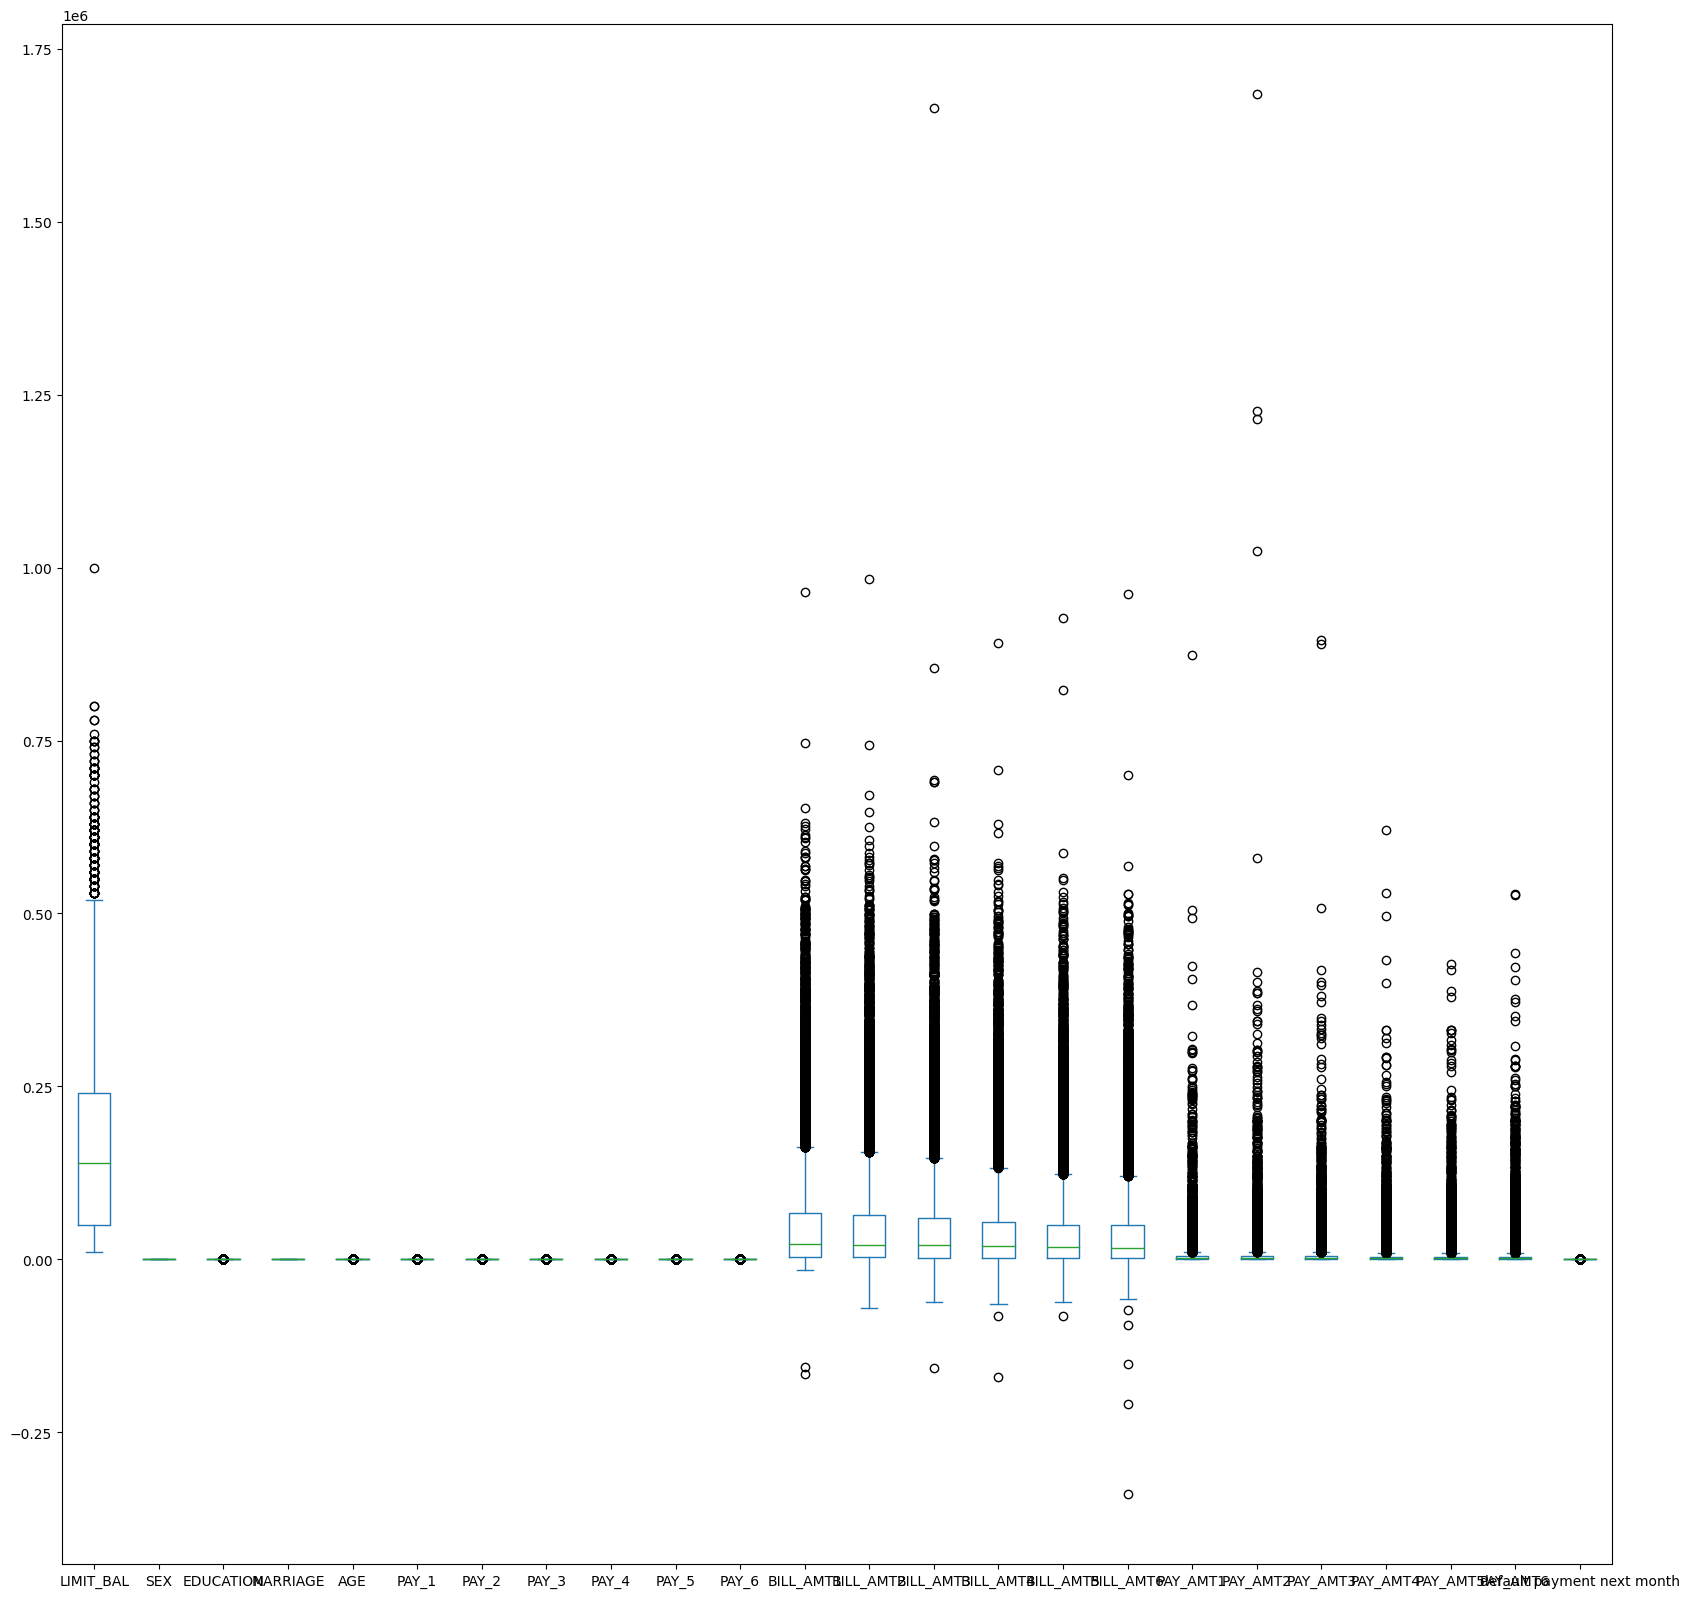

In [12]:
data.plot(kind='box',figsize=(20,20)) #OUTLIERS

In [13]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

SCALING THE FEATURES

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data.loc[:,['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=sc.fit_transform(data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]])

***MODELLING***

In [15]:
x=data.drop('default payment next month',axis='columns')
y = data['default payment next month']

In [16]:
#splitting the data to train data and test data for modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Naive Bayes classification**

In [17]:
from sklearn.naive_bayes import GaussianNB
modelNB=GaussianNB()
modelNB.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred=modelNB.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.7076666666666667


In [19]:
# cross validation
from sklearn.model_selection import cross_val_score
cv_NB=cross_val_score(modelNB,x,y,cv=5)
cv_NB.mean()

0.7050333333333334

**SVM classifier**

In [25]:
from sklearn.svm import SVC
metric_k=[]
svm_types=['linear','rbf','poly']
for s in svm_types:
  svmclf=SVC(kernel=s)
  svmclf.fit(x_train,y_train)
  y_pred_svm=svmclf.predict(x_test)
  acc=accuracy_score(y_test,y_pred_svm)
  metric_k.append(acc)
print(metric_k)

[0.8105, 0.8195, 0.8081666666666667]


In [21]:
# cross validation
cv_svm=cross_val_score(svmclf,x,y,cv=5)
cv_svm.mean()

0.8050666666666666

**kNN classifier**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
metric_2 = []
neighbours = np.arange(3,15)
for c in neighbours:
  knn_clf = KNeighborsClassifier(n_neighbors= c, metric='minkowski', p=2)
  knn_clf.fit(x_train, y_train)
  y_pred_knn= knn_clf.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_2.append(acc)
print(metric_2)

[0.7811666666666667, 0.8, 0.795, 0.8058333333333333, 0.8026666666666666, 0.8091666666666667, 0.809, 0.8106666666666666, 0.8118333333333333, 0.8118333333333333, 0.8105, 0.81]


In [24]:
# cross validation
cv_knn=cross_val_score(knn_clf,x,y,cv=5)
cv_knn.mean()

0.7962

**Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=150,random_state=42)
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)
from sklearn import metrics
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred_rf))

Accuracy =  0.8168333333333333


In [28]:
# cross validation
cv_rf=cross_val_score(rf_clf,x,y,cv=5)
cv_rf.mean()

0.8154999999999999

**AdaBoost Classifier**

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators=150,random_state=42)
ada_clf.fit(x_train,y_train)
y_pred_ada=ada_clf.predict(x_test)
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred_ada))

Accuracy =  0.817


In [30]:
# cross validation
cv_ada=cross_val_score(ada_clf,x,y,cv=5)
cv_ada.mean()

0.8171333333333333

Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf=GradientBoostingClassifier(n_estimators=50,max_depth=3,random_state=42)
grad_clf.fit(x_train,y_train)
y_pred_grad=grad_clf.predict(x_test)
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred_grad))

Accuracy =  0.8201666666666667


In [32]:
# cross validation
cv_grad=cross_val_score(grad_clf,x,y,cv=5)
cv_grad.mean()

0.8215333333333333

XGBOOST Classifier

In [33]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(n_estimators=50,max_depth=3,random_state=42)
xgb_clf.fit(x_train,y_train)
y_pred_xgb=xgb_clf.predict(x_test)
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred_xgb))

Accuracy =  0.819


In [34]:
# cross validation
cv_xgb=cross_val_score(xgb_clf,x,y,cv=5)
cv_xgb.mean()

0.8205666666666668

In [39]:
acc_model = {'MODEL': ['NaiveBayes', 'SVM', 'kNN', 'RandomForest','AdaBoost','Gradient','XGBoost'], 'ACCURACY': [0.708, 0.819,  0.8118, 0.817,0.817,0.820,0.819],'CV':[0.705,0.805,0.7962, 0.816,0.817,0.822,0.821]}
table=pd.DataFrame(acc_model)
print(table)

          MODEL  ACCURACY      CV
0    NaiveBayes    0.7080  0.7050
1           SVM    0.8190  0.8050
2           kNN    0.8118  0.7962
3  RandomForest    0.8170  0.8160
4      AdaBoost    0.8170  0.8170
5      Gradient    0.8200  0.8220
6       XGBoost    0.8190  0.8210


The best models are GradientBoosting,SVM and XGBoosting with an accuracy score of 82%.

HYPER PARAMETER TUNING GradientBoosting Classifier

In [45]:
parameter_grad={'max_depth':[4,5,6,7,8,9,10,11,12],'n_estimators':[20,30,40,50,60,70,80,90]}
from sklearn.model_selection import GridSearchCV
grid_search_grad=GridSearchCV(grad_clf,parameter_grad,cv=5,scoring='accuracy',n_jobs=-1)
grid_result_grad=grid_search_grad.fit(x_train,y_train)
print('Best parameters :',grid_result_grad.best_params_)
print('Best score:',grid_result_grad.best_score_)

Best parameters : {'max_depth': 5, 'n_estimators': 60}
Best score: 0.8214583333333334


Modelling with the tuned parameters

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf=GradientBoostingClassifier(n_estimators=60,max_depth=5,random_state=42)
grad_clf.fit(x_train,y_train)
y_pred_grad=grad_clf.predict(x_test)
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred_grad))

Accuracy =  0.8205
